In [1]:
%matplotlib inline

import os
import json
import matplotlib.pyplot as plt
import numpy as np

from alignednotemodel.PitchDistribution import hz_to_cent, cent_to_hz
from alignednotemodel import alignednotemodel

In [2]:
folder = './ussak--sazsemaisi--aksaksemai----dede_salih_efendi/'
pitchfile = os.path.join(folder, 'pitch_corrected.json')
notefile = os.path.join(folder, 'alignedNotes.json')
tonicfile = os.path.join(folder, 'tonic.json')

modelsavefile = os.path.join(folder, 'noteModels.json')

In [3]:
pitch = np.array(json.load(open(pitchfile, 'r')))
alignednotes = json.load(open(notefile, 'r'))['notes']
tonic = json.load(open(tonicfile, 'r'))['scoreInformed']['Value']

In [4]:
noteModels = alignednotemodel.getModels(pitch, alignednotes, tonic, kernel_width=7.5)

> /Users/sertansenturk_mtg/Documents/notaIcra/code/aligned-note-models/alignednotemodel/alignednotemodel.py(25)getModels()
-> for key in noteModels.keys():
(Pdb) noteModels['all']['distribution'].vals[allhistbin_id-1:allhistbin_id+2]
array([ 0.00142916,  0.00130861,  0.00015734])
(Pdb) noteModels['all']['distribution'].vals[allhistbin_id-3:allhistbin_id+4]
array([ 0.00286719,  0.00267697,  0.00142916,  0.00130861,  0.00015734,
        0.00019075,  0.00012212])
(Pdb) noteModels['all']['distribution'].vals[allhistbin_id-5:allhistbin_id+1]
array([ 0.00077655,  0.00182448,  0.00286719,  0.00267697,  0.00142916,
        0.00130861])
(Pdb) c


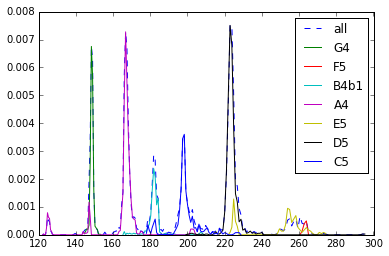

In [7]:
fig, ax = plt.subplots()
ax.plot(noteModels['all']['distribution'].bins, noteModels['all']['distribution'].vals, '--', label='all')
for key in noteModels.keys():
    if not key == 'all':
        ax.plot(noteModels[key]['distribution'].bins, noteModels[key]['distribution'].vals, label=key)
legend = ax.legend(loc='upper right') 

plt.show()



fig, ax = plt.subplots()
ax.plot(pitch[:,0], pitch[:,1], 'g', label='Pitch', alpha = 0.7)

plt.xlabel('Time (sec)')
plt.grid(True)

for note in alignednotes:
    if note['Symbol'] == 'E5':
        ax.plot(note['Interval'], cent_to_hz(
                [note['Pitch']['Value'], note['Pitch']['Value']], tonic), 
                'r', alpha=0.4, linewidth=4) 

legend = ax.legend(loc='lower right') 
plt.show()

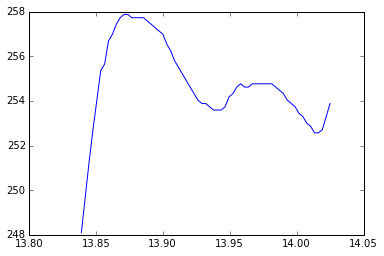

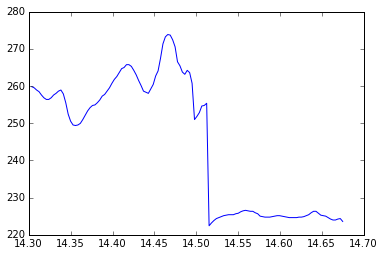

In [6]:
for note in noteModels['E5']['notes']:
    plt.plot(note['trajectory'][:,0], note['trajectory'][:,1])
    plt.show()